In [30]:
import os
import copy
import ase
import ase.optimize
import ase.constraints
import ase.build
import ase.io.cif
import ase.io.trajectory
import ase.visualize
import ase.collections
import numpy as np

import sys
sys.path.append('/home/moon/surface/surface_thermo')
import util

import matplotlib.pyplot as plt
%matplotlib inline

import scipy.cluster

In [2]:
# # ads_name = 'h2cch2-h'
# ads_name = 'cc-h'
# ads_name = 'h2co-h'
# ads_name = 'hcc-h'
# ads_name = 'hcch-h'
# ads_name = 'hcch2-h'
# ads_name = 'hco-h'

# tr_file = f'/home/moon/Bidentates/traj_files_and_scripts/{ads_name}_relax_final.traj'

# # hcch-h_relax_final.traj
# traj = ase.io.trajectory.Trajectory(tr_file)
# ase.io.write(f'{ads_name}.png', traj[-1], rotation="0x,0y,0z")
# ase.io.write(f'{ads_name}_side.png', traj[-1], rotation="-90x,0y,0z")
# # ase.visualize.view(traj[-1], viewer='x3d')

In [3]:

centroid = [ 9.68487496, 11.26148251,  4.504593,    1.35105452, 12.61334549,  7.43257846]

In [ ]:
indices = np.arange(len(centroid))
sorted_indices = [x for _, x in sorted(zip(centroid, indices))]

In [ ]:
for i in range(len(centroid)):
    print(centroid[sorted_indices[i]])

In [ ]:
sorted_indices

In [ ]:
centroid[3]

In [ ]:
centroid[2]

In [ ]:
indices

[ 5.63074125  2.02685126 10.36104898 12.38763076  8.33349706]


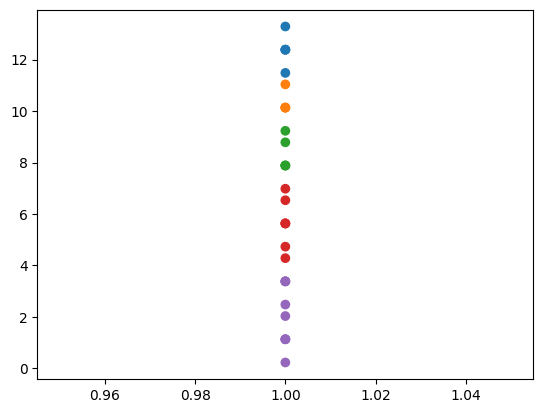

In [4]:
atoms = ase.io.cif.read_cif('Cr2O3.cif')
labels = util.enumerate_layers(atoms)
atoms.set_tags(labels)

Zs = np.array([atom.position[2] for atom in atoms])
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
color_labels = [colors[labels[i] - 1 % len(colors)] for i in range(len(labels))]

plt.scatter(np.ones_like(Zs), Zs, c=color_labels)
plt.show()

In [5]:
atoms.info

{'spacegroup': Spacegroup(167, setting=1),
 'unit_cell': 'conventional',
 'occupancy': {'0': {'Cr': 1}, '1': {'O': 1}}}

In [7]:
s = ase.build.fcc111('Pt', size=(3,3,3), a=1)

In [9]:
s.info

{'adsorbate_info': {'cell': array([[0.70710678, 0.        ],
         [0.35355339, 0.61237244]]),
  'sites': {'ontop': (0, 0),
   'bridge': (0.5, 0),
   'fcc': (0.3333333333333333, 0.3333333333333333),
   'hcp': (0.6666666666666666, 0.6666666666666666)}}}

In [ ]:
labels

In [ ]:
centroid

In [ ]:
def compute_error(atoms, centroids, labels):
    a = 1.0  # characteristic length between layers
    error = 0
    assert len(atoms) == len(labels)
    max_mass = np.max(atoms.get_masses())
    for i in range(len(atoms)):
        # penalize for distance from layer, multiplied by atomic weight for extra importance to heavy atoms
        # penalize for centroid nonuniformity
        error += np.float_power(atoms[i].position[2] - centroids[labels[i]], 2.0) * atoms.get_masses()[i] / max_mass

    # add penalty for nonuniform spacing of centroids

    # get centroid's nearest neighbor
    centroid_min_distances = np.zeros_like(centroids) + np.inf
    for i in range(len(centroids)):
        for j in range(len(centroids)):
            if i == j:
                continue
            if np.abs(centroids[i] - centroids[j]) < centroid_min_distances[i]:
                centroid_min_distances[i] = np.abs(centroids[i] - centroids[j])

    nonuniformity_error = np.sum(np.float_power(centroid_min_distances - np.median(centroid_min_distances), 2.0))
    characteristic_length_error = 10 * np.sum(np.float_power(centroid_min_distances - a, 2.0))
    error += nonuniformity_error + characteristic_length_error
    
    return error

In [ ]:
Zs = np.array([atom.position[2] for atom in atoms])

In [ ]:
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']


nlayers = np.arange(2, 32)
errors = np.zeros_like(nlayers) + np.nan
for i, nlayer in enumerate(nlayers):
    # centroid, label = scipy.cluster.vq.kmeans2(Zs, nlayer)

    centroid, label = scipy.cluster.vq.kmeans2(Zs, nlayer)
    print(centroid)

    # if a bin only contains 1, break here
    bin_counts = np.zeros(nlayer)
    for j in range(len(Zs)):
        bin_counts[label[j]] += 1
    
    if 1 in bin_counts or 0 in bin_counts:
        print('spread too thin!')
        break
    
    color_labels = [colors[label[i] % len(colors)] for i in range(len(label))]
    
    plt.scatter(np.ones_like(Zs), Zs, c=color_labels)
    plt.show()
    errors[i] = compute_error(atoms, centroid, label)

In [ ]:
plt.scatter(nlayers, errors)

In [ ]:
ase.visualize.view(atoms, viewer='x3d')

In [ ]:
compute_error(Zs, centroid, label)

In [ ]:
label

In [12]:
tr_file = '/home/moon/surface/surface_thermo/results/slab/Cr2O3_z_slab.traj'
traj = ase.io.trajectory.Trajectory(tr_file)

In [13]:
traj[-1].get_tags()

array([3, 1, 2, 2, 2, 3, 1, 1, 1, 2, 3, 3, 1, 3, 1, 3, 1, 3, 3, 2, 3, 2,
       3, 2, 2, 1, 2, 1, 2, 1, 3, 1, 2, 2, 2, 3, 1, 1, 1, 2, 3, 3, 1, 3,
       1, 3, 1, 3, 3, 2, 3, 2, 3, 2, 2, 1, 2, 1, 2, 1, 3, 1, 2, 2, 2, 3,
       1, 1, 1, 2, 3, 3, 1, 3, 1, 3, 1, 3, 3, 2, 3, 2, 3, 2, 2, 1, 2, 1,
       2, 1, 3, 1, 2, 2, 2, 3, 1, 1, 1, 2, 3, 3, 1, 3, 1, 3, 1, 3, 3, 2,
       3, 2, 3, 2, 2, 1, 2, 1, 2, 1, 3, 1, 2, 2, 2, 3, 1, 1, 1, 2, 3, 3,
       1, 3, 1, 3, 1, 3, 3, 2, 3, 2, 3, 2, 2, 1, 2, 1, 2, 1, 3, 1, 2, 2,
       2, 3, 1, 1, 1, 2, 3, 3, 1, 3, 1, 3, 1, 3, 3, 2, 3, 2, 3, 2, 2, 1,
       2, 1, 2, 1, 3, 1, 2, 2, 2, 3, 1, 1, 1, 2, 3, 3, 1, 3, 1, 3, 1, 3,
       3, 2, 3, 2, 3, 2, 2, 1, 2, 1, 2, 1, 3, 1, 2, 2, 2, 3, 1, 1, 1, 2,
       3, 3, 1, 3, 1, 3, 1, 3, 3, 2, 3, 2, 3, 2, 2, 1, 2, 1, 2, 1])

In [14]:
ase.io.write('side.png', traj[-1], rotation='-90x,0y,0z')

KeyError: '3'

In [17]:
traj[-1].info.pop('occupancy')

{0: {'Cr': 1}, 1: {'O': 1}}

In [20]:
traj[-1].info['occupancy'] = None

In [22]:
atoms = traj[-1]

In [27]:
atoms.info.pop('occupancy')

In [28]:
atoms.info

{'spacegroup': {'number': 167, 'setting': 1},
 'unit_cell': 'conventional',
 'top layer atom index': 7}

In [29]:
ase.io.write('side.png', atoms, rotation='-90x,0y,0z')

In [ ]:
centroid

In [ ]:
tr_file = '/home/moon/surface/surface_thermo/results/system/Cr2O3_z_H2/Cr2O3_z_H2_0_rot0.0.traj'

In [ ]:
traj = ase.io.trajectory.Trajectory(tr_file)

In [ ]:
traj[-1].get_tags()

In [ ]:
# ase.io.write('side.png', traj[-1], rotation='-90x,0y,0z')

In [ ]:
scipy.cluster.vq.kmeans2()

In [ ]:
import fairchem.core.models.model_registry
import fairchem.core.common.relaxation.ase_utils


In [ ]:
# Initialize fairchem ocp calculator
checkpoint_path = fairchem.core.models.model_registry.model_name_to_local_file(
    'GemNet-OC-S2EFS-nsn-OC20+OC22',
    # 'EquiformerV2-31M-S2EF-OC20-All+MD',
    local_cache='/home/moon/surface/tmp/fairchem_checkpoints/'
)
calc = fairchem.core.common.relaxation.ase_utils.OCPCalculator(
    checkpoint_path=checkpoint_path,
    cpu=True,
    seed=400
)

In [ ]:
atoms = ase.io.cif.read_cif('Cr2O3.cif')

util.enumerate_layers(atoms)


# y direction

In [ ]:
# read in Cr2O3 cif file
atoms = ase.io.cif.read_cif('Cr2O3.cif')


# get the highest atom in the group
indices = np.arange(len(atoms))
heights = [atom.position[2] for atom in atoms]
sorted_order = [x for _, x in sorted(zip(heights, indices))][::-1]
print(atoms[sorted_order[0]])

# set tags to something so the calculator will work
tags = atoms.get_tags()
tags[sorted_order[0]] = 1
atoms.set_tags(tags)
atoms.info['top layer atom index'] = atoms[sorted_order[0]]

adsorbate = ase.build.molecule('CO2')
ase.build.add_adsorbate(atoms, adsorbate, 2.0, position=(0.7547939021521931, 1.5815694906712414))


In [ ]:
atoms[sorted_order[3]]

In [ ]:
# tagging layers
atoms = ase.io.cif.read_cif('Cr2O3.cif')

In [ ]:
ase.visualize.view(atoms, viewer='x3d')

In [ ]:
atoms.get_tags()

# Z direction

# Read in atoms

In [31]:
# read in Cr2O3 cif file
atoms = ase.io.cif.read_cif('Cr2O3.cif')

# set tags to something so the calculator will work
tags = atoms.get_tags()
tags[1] = 1
atoms.set_tags(tags)

In [ ]:
atoms[0].position

In [32]:
ase.visualize.view(atoms, viewer='x3d')

# stack in x and y directions to make slab

In [33]:
slab = ase.build.stack(atoms, atoms, axis=0)
slab = ase.build.stack(slab, slab, axis=1)
height = slab.get_cell()[2][2]

slab = ase.build.stack(slab, slab, axis=2)

# constrain all atoms below height
fixed_indices = []
for i, pos in enumerate(slab.get_positions()):
    if pos[2] < height:
        fixed_indices.append(i)
fix_bottom_layers = ase.constraints.FixAtoms(indices=fixed_indices)
slab.set_constraint(fix_bottom_layers)



# add vacuum
vacuum = 10
cell = slab.get_cell()
cell[2][2] += vacuum
slab.set_cell(cell)

In [34]:
ase.visualize.view(slab, viewer='x3d')

In [ ]:
# try optimizing and seeing how much it changes
original = copy.deepcopy(slab)


In [ ]:
slab.calc = calc
opt = ase.optimize.BFGS(slab)
opt.run(0.01, 100)

In [ ]:
displacements = slab.positions - original.positions
print(np.max(np.linalg.norm(displacements, axis=1)))

In [ ]:
slab.pbc

In [ ]:
ase.visualize.view(slab, viewer='x3d')

In [ ]:
len(fixed_indices)

In [ ]:
len(slab)

In [ ]:
fixed_indices

In [ ]:
atoms.calc = calc
opt = ase.optimize.BFGS(atoms)
opt.run(0.01, 10)

In [ ]:
displacements = atoms2.positions - atoms.positions
print(np.max(np.linalg.norm(displacements, axis=1)))

In [ ]:
atoms.set_cell([[5.00374042, 0.0, 0.0], [-2.5018702099999985, 4.333366317663017, 0.0], [0.0, 0.0, 30.51377901]])
atoms.pbc = [True, True, False]


for i in range(len(atoms)):
    atoms.positions[i, 2] += 10.0
    

In [ ]:
atoms1 = ase.build.stack(atoms, atoms, axis=0)
atoms2 = ase.build.stack(atoms1, atoms1, axis=1)
ase.visualize.view(atoms2, viewer='x3d')

In [ ]:
atoms2.pbc

In [ ]:
atoms2.calc = calc

In [ ]:
atoms2.get_potential_energy()

In [ ]:
atoms.pbc

In [ ]:
ase.visualize.view(slab, viewer='x3d')

In [ ]:
atoms.calc = calc

atoms.get_potential_energy()


# fmax = 0.5
# MAXSTEP = 10

# opt = ase.optimize.BFGS(atoms, trajectory='my_traj.traj', append_trajectory=True)
# opt.run(fmax=fmax, steps=MAXSTEP)

In [ ]:
slab = ase.build.fcc111('Fe', size=(3, 3, 4), vacuum=10, a=3.0)
slab.pbc

slab.calc = calc
slab.get_potential_energy()

In [ ]:
slab = ase.build.fcc111('Cr', size=(3, 3, 4), vacuum=10, a=3.0)
slab.pbc

slab.calc = calc
slab.get_potential_energy()

In [ ]:
slab.get_tags()

In [ ]:
slab.set_cell(atoms.get_cell())

In [ ]:
slab.get_potential_energy()

In [ ]:
for i in range(len(slab) -2):
    del slab[1]

In [ ]:
slab.get_potential_energy()

In [ ]:
slab

In [ ]:
slab.get_tags()

In [ ]:
atoms.get_tags()

In [ ]:
len(atoms)

In [ ]:
slab.set_cell(atoms.cell)
slab.get_potential_energy()

In [ ]:
slab += atoms
slab.get_potential_energy()

In [ ]:
del slab[[atom.index for atom in slab if atom.symbol=='Fe']]

slab.get_potential_energy()

In [ ]:
ase.visualize.view(slab, viewer='x3d')

In [ ]:
slab.calc = calc
slab.get_potential_energy()

In [ ]:
slab[0]

In [ ]:
# try 3 "facet"s of this material and see which gives the lowest energy

In [ ]:
# stack 2 long ones on top of each other, fix everything in the bottom unit cells

In [ ]:
slab.cell

In [ ]:
# read in Cr2O3 cif file

atoms = ase.io.cif.read_cif('Cr2O3.cif')


atoms0 = ase.build.stack(atoms, atoms, axis=0)
atoms1 = ase.build.stack(atoms0, atoms0, axis=1)
atoms2 = ase.build.stack(atoms1, atoms1, axis=2)


In [ ]:
atoms2.get_all_distances().shape

In [ ]:
# check max distance between Cr atoms
distance_matrix = atoms2.get_all_distances()
for i in range(len(atoms2)):
    if atoms2[i].symbol == 'Cr':
        distances = np.array(list(distance_matrix[i, :i]) + list(distance_matrix[i, i + 1:]))
        assert np.min(distances) > 1.5

In [ ]:

ase.visualize.view(atoms2, viewer='x3d')